<a href="https://colab.research.google.com/github/runneb/Complete-Python-3-Bootcamp/blob/master/Upgrad_Leads_generation_Assignment_Rashmi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Name** - Rashmi Bennur
### **Email** - rashme45@gmail.com
### **Contact** - +91-6363037556

In [ ]:
import pandas as pd
import seaborn as sns
import shap
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [ ]:
df_leads_raw = pd.read_csv("data/Leads.csv")
df_leads_raw

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [ ]:
df_leads_raw = df_leads_raw.drop(columns=['Prospect ID','Lead Number'])

In [ ]:
col_names = df_leads_raw.columns

col_names

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [ ]:
df_leads_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [ ]:
categorical = [var for var in df_leads_raw.columns if df_leads_raw[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 29 categorical variables

The categorical variables are : ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [ ]:
df_leads_raw[categorical].isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations                             0
Receive More Updates About Our Courses              0
Tags                        

In [ ]:
cat1 = [var for var in categorical if df_leads_raw[var].isnull().sum()!=0]

print(df_leads_raw[cat1].isnull().sum())

Lead Source                                        36
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Tags                                             3353
Lead Quality                                     4767
Lead Profile                                     2709
City                                             1420
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
dtype: int64


In [ ]:
numerical = [var for var in df_leads_raw.columns if df_leads_raw[var].dtype!='O' and var!='Converted']
numerical

['TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [ ]:
print(df_leads_raw[numerical].isnull().sum())

TotalVisits                     137
Total Time Spent on Website       0
Page Views Per Visit            137
Asymmetrique Activity Score    4218
Asymmetrique Profile Score     4218
dtype: int64


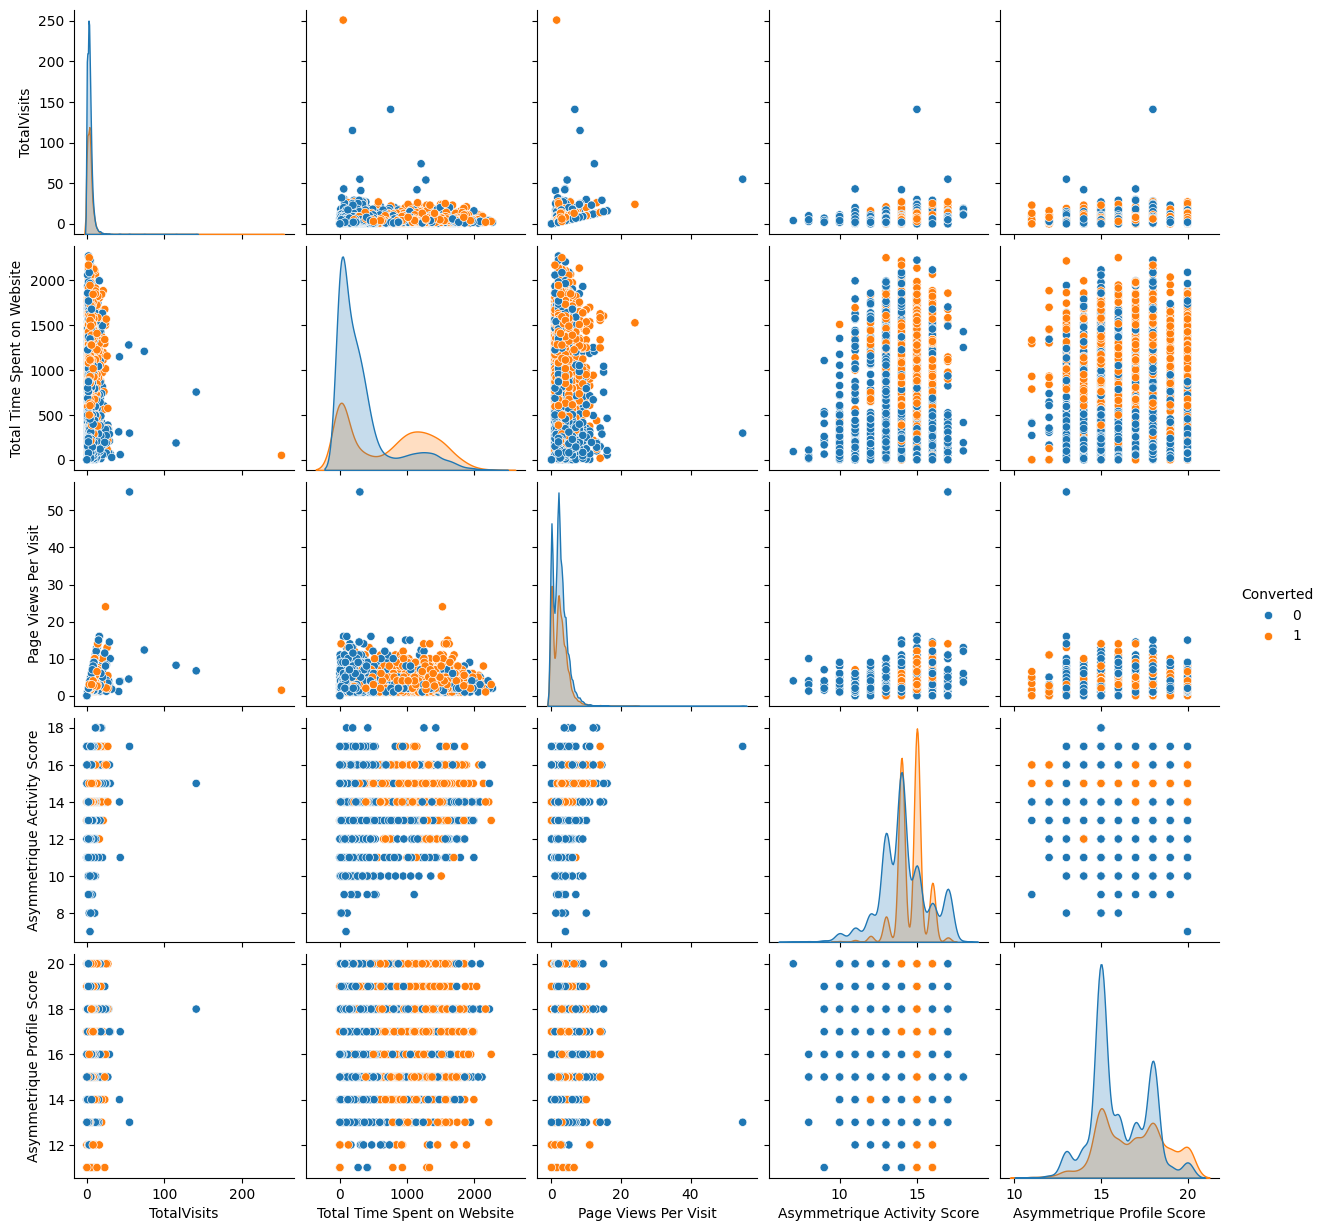

In [ ]:
sns.pairplot(df_leads_raw, hue='Converted')

In [ ]:
for col in categorical:
    print(col)
    list_map = df_leads_raw[col].unique()
    #print(list_map)

    dict= {}
    num=1
    for cat in list_map:
        dict[cat]= num
        num=num+1

    df_leads_raw[col] = df_leads_raw[col].map(dict)

Lead Origin
Lead Source
Do Not Email
Do Not Call
Last Activity
Country
Specialization
How did you hear about X Education
What is your current occupation
What matters most to you in choosing a course
Search
Magazine
Newspaper Article
X Education Forums
Newspaper
Digital Advertisement
Through Recommendations
Receive More Updates About Our Courses
Tags
Lead Quality
Update me on Supply Chain Content
Get updates on DM Content
Lead Profile
City
Asymmetrique Activity Index
Asymmetrique Profile Index
I agree to pay the amount through cheque
A free copy of Mastering The Interview
Last Notable Activity


In [ ]:
df_leads_raw

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,1,1,1,1,0,0.0,0,0.00,1,1,...,1,1,1,1,1,15.0,15.0,1,1,1
1,1,2,1,1,0,5.0,674,2.50,2,2,...,1,1,1,1,1,15.0,15.0,1,1,2
2,2,3,1,1,1,2.0,1532,2.00,2,2,...,1,2,2,1,2,14.0,20.0,1,2,2
3,2,3,1,1,0,1.0,305,1.00,3,2,...,1,1,2,1,2,13.0,17.0,1,1,1
4,2,4,1,1,1,2.0,1428,1.00,4,2,...,1,1,2,1,2,15.0,18.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,2,3,2,1,1,8.0,1845,2.67,18,14,...,1,2,2,1,2,15.0,17.0,1,1,16
9236,2,3,1,1,0,2.0,238,2.00,14,2,...,1,2,2,1,2,14.0,19.0,1,2,10
9237,2,3,2,1,0,2.0,199,2.00,14,2,...,1,2,2,1,2,13.0,20.0,1,2,10
9238,2,4,1,1,1,3.0,499,3.00,14,2,...,1,3,5,1,1,15.0,16.0,1,1,10


In [ ]:
for df1 in [df_leads_raw]:
    for col in numerical:
        if col=='Converted':
            continue
        col_median=df_leads_raw[col].median()
        df1[col].fillna(col_median, inplace=True)

In [ ]:
X = df_leads_raw.drop(['Converted'], axis=1)

y = df_leads_raw['Converted']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
cols = X_train.columns

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])


In [ ]:
X_train[numerical].isnull().sum()

TotalVisits                    0
Total Time Spent on Website    0
Page Views Per Visit           0
Asymmetrique Activity Score    0
Asymmetrique Profile Score     0
dtype: int64

In [ ]:
logreg_model = LogisticRegression(solver='liblinear', random_state=556)# {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'},

logreg_model.fit(X_train, y_train)

LogisticRegression(random_state=556, solver='liblinear')

In [ ]:
pred = logreg_model.predict(X_test)
clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
print("Test Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

Test Result:
Accuracy Score: 81.28%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.830926    0.780924  0.812771     0.805925      0.811364
recall        0.869333    0.724758  0.812771     0.797046      0.812771
f1-score      0.849696    0.751793  0.812771     0.800745      0.811393
support    1125.000000  723.000000  0.812771  1848.000000   1848.000000
_______________________________________________
Confusion Matrix: 
 [[978 147]
 [199 524]]



In [ ]:
shap.initjs()

x_train = shap.kmeans(X, 100)
explainer = shap.KernelExplainer(logreg_model.predict, x_train)
shap_values = explainer.shap_values(X_test, nsamples=200)

  0%|          | 0/1848 [00:00<?, ?it/s]

In [ ]:
shap_reshaped= np.reshape(shap_values, (-1, 34))
shap_df = pd.DataFrame(data=shap_reshaped,columns=cols)

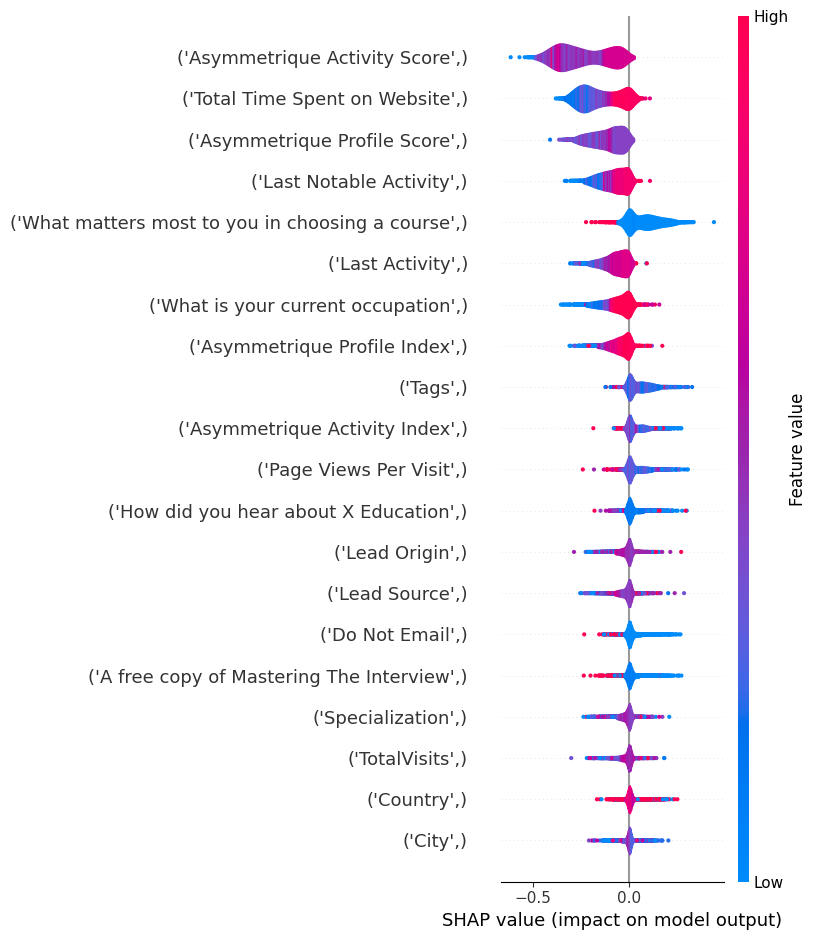

In [ ]:
shap.summary_plot(shap_reshaped, X_test, plot_type="violin")

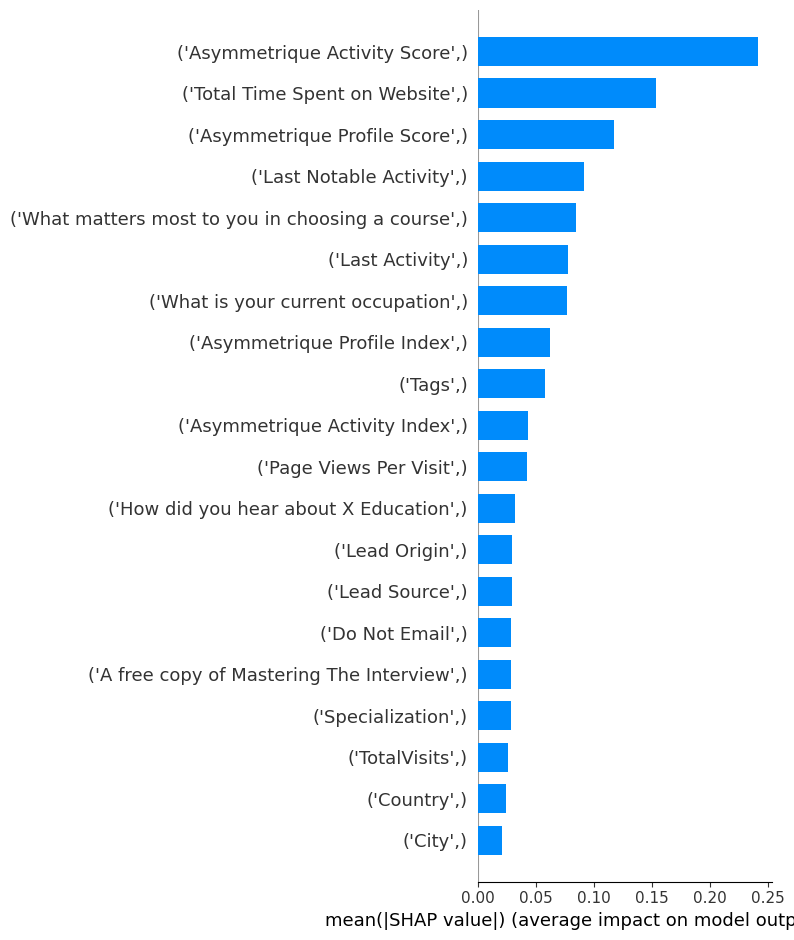

In [ ]:
shap.summary_plot(shap_reshaped, X_test, plot_type="bar")